# Linear Regression

In [166]:
# To install tensorflow from jupyter notebook
# <!> means that this will run in command line
# !pip install tensorflow

In [167]:
import tensorflow as tf
print(tf.__version__)

2.4.3


In [168]:
# <?> to show you details about your command or function
# tf?
# You can use python built in help function too
# help(tf)
tf.random.uniform?

Signature:
tf.random.uniform(
    shape,
    minval=0,
    maxval=None,
    dtype=tf.float32,
    seed=None,
    name=None,
)
Docstring:
Outputs random values from a uniform distribution.

The generated values follow a uniform distribution in the range
`[minval, maxval)`. The lower bound `minval` is included in the range, while
the upper bound `maxval` is excluded.

For floats, the default range is `[0, 1)`.  For ints, at least `maxval` must
be specified explicitly.

In the integer case, the random integers are slightly biased unless
`maxval - minval` is an exact power of two.  The bias is small for values of
`maxval - minval` significantly smaller than the range of the output (either
`2**32` or `2**64`).

Examples:

>>> tf.random.uniform(shape=[2])
<tf.Tensor: shape=(2,), dtype=float32, numpy=array([..., ...], dtype=float32)>
>>> tf.random.uniform(shape=[], minval=-1., maxval=0.)
<tf.Tensor: shape=(), dtype=float32, numpy=-...>
>>> tf.random.uniform(shape=[], minval=5, maxval=10, dtyp

In [169]:
tf.random.uniform([1])
print(tf.random.uniform([1]))
var = tf.random.uniform([1])
# transform tensor representation to numpy representation
print(var.numpy())

tf.Tensor([0.57660055], shape=(1,), dtype=float32)
[0.30550098]


In [170]:
# Create our data
def data_creation_x(w=0.1, b=0.5, n=100):
    X = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), mean=0.0, stddev=0.01)
    Y = X*w + b + noise
    # print(x)
    return X, Y

X, Y = data_creation_x(n=100)

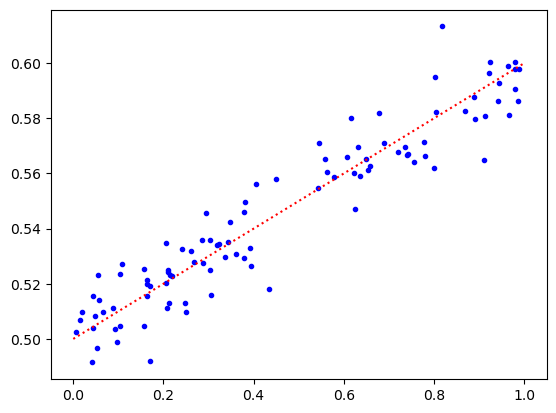

In [171]:
# <%> means that we are using a magic keyword, in jupyter notebook it means that we want to run some internal command
# matplotlib inline means that all the images created by matplotlib will get printed out in the screen by jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

w = 0.1
b = 0.5
# plt.hist(X.numpy())
# Have the same functionality as the next one
# plt.subplot(2, 1, 1)
# plt.scatter(X.numpy(), Y.numpy())
# plt.subplot(2, 1, 2)
plt.plot(X.numpy(), Y.numpy(), 'b.')
plt.plot([0,1], [0*w+b, 1*w+b], 'r:')
plt.show()

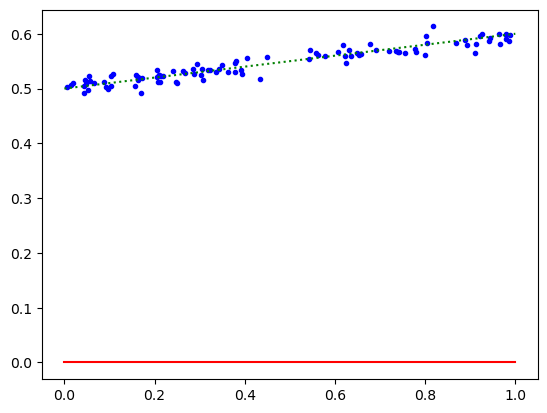

In [172]:
# Problem: find the w and b
w_guess = 0.0
b_guess = 0.0
plt.plot(X.numpy(), Y.numpy(), 'b.')
plt.plot([0,1], [0*w+b, 1*w+b], 'g:')
plt.plot([0,1], [0*w_guess+b_guess, 1*w_guess+b_guess], 'r')
plt.show()

In [173]:
# For one time this is fine, but we want to constantly repeat this -> function
total_square_error = 0

for i in range(len(Y)):
    total_square_error += (Y[i] - (X[i]*w_guess + b_guess))**2
mean_square_error = total_square_error/len(Y)

print(total_square_error)
print(mean_square_error)

tf.Tensor(29.833426, shape=(), dtype=float32)
tf.Tensor(0.29833424, shape=(), dtype=float32)


In [174]:
# Prediction
def predict(x, w=w, b=b):
    y = x*w + b
    return y

# Loss function
def mean_squared_error(y_pred, Y):
    # (Y - y_pred)**2
    # But we gonna do it with tensor
    # tf.reduce_mean calculate the mean of the array that you provided for it
    # tf.square, square the number
    return tf.reduce_mean(tf.square(y_pred-Y))

print(mean_squared_error(predict(X), Y))

tf.Tensor(0.00010239489, shape=(), dtype=float32)


In [175]:
# set them to the right number
w_guess = 0.1
b_guess = 0.5
print(mean_squared_error(predict(X), Y))
# As you can see the error drop significantly

tf.Tensor(0.00010239489, shape=(), dtype=float32)


Step 0
Step 0, Weight 0.142534539103508, Bias -0.6909348368644714
Step 20
Step 20, Weight 0.4671821892261505, Bias 0.31404128670692444
Step 40
Step 40, Weight 0.3680661618709564, Bias 0.36720675230026245
Step 60
Step 60, Weight 0.29442888498306274, Bias 0.40358245372772217
Step 80
Step 80, Weight 0.2406221479177475, Bias 0.4301510453224182
Step 100
Step 100, Weight 0.20130875706672668, Bias 0.44956308603286743
Step 120
Step 120, Weight 0.1725848764181137, Bias 0.46374624967575073
Step 140
Step 140, Weight 0.15159805119037628, Bias 0.47410908341407776
Step 160
Step 160, Weight 0.13626423478126526, Bias 0.4816805422306061
Step 180
Step 180, Weight 0.1250607669353485, Bias 0.48721253871917725
Step 200
Step 200, Weight 0.11687503755092621, Bias 0.4912545084953308
Step 220
Step 220, Weight 0.11089420318603516, Bias 0.4942076802253723
Step 240
Step 240, Weight 0.10652439296245575, Bias 0.49636539816856384
Step 260
Step 260, Weight 0.10333161801099777, Bias 0.49794191122055054
Step 280
Step 2

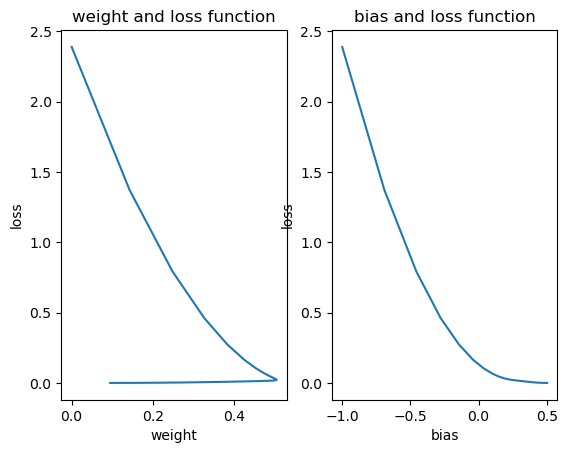

In [176]:
# Problem: Optimize our loss function, how to change w and b -> differentiation
# Need to initialize w and b to tensor space
w = tf.Variable(0.0)
b = tf.Variable(-1.0)
# You calculate the slop, but you want to go there slowly, so you won't miss anything -> learning rate
learning_rate = 0.1
# Need to limit it, cause maybe you don't find your optimal point
# steps = 200
# increase number of steps
steps = 500

loss_l = []
w_l = []
b_l = []
gradients_wl = []
gradients_bl = []

for step in range(steps):
    # Calculate Derivatives
    # Using with as a resource management
    with tf.GradientTape() as tape:
        predictions = predict(X, w=w, b=b)
        loss = mean_squared_error(predictions, Y)
        loss_l.append(loss.numpy())
        w_l.append(w.numpy())
        b_l.append(b.numpy())

    gradients = tape.gradient(loss, [w, b])
    # Tracker
    gradients_wl.append(gradients[0].numpy())
    gradients_bl.append(gradients[1].numpy())

    # take the current value and subtract the current function
    # gradients[0] = gradient for w
    w.assign_sub(gradients[0]*learning_rate)
    b.assign_sub(gradients[1]*learning_rate)


    if step%20 == 0:
        print("Step {}".format(step))
        print(f"Step {step}, Weight {w.numpy()}, Bias {b.numpy()}")

plt.subplot(1, 2, 1)
plt.title("weight and loss function")
plt.xlabel("weight")
plt.ylabel("loss")
plt.plot(w_l, loss_l)
# plt.plot(w_l, gradients_wl, 'r.')

plt.subplot(1, 2, 2)
plt.title("bias and loss function")
plt.xlabel("bias")
plt.ylabel("loss")
plt.plot(b_l, loss_l)
# plt.plot(w_l, gradients_bl, 'r.')


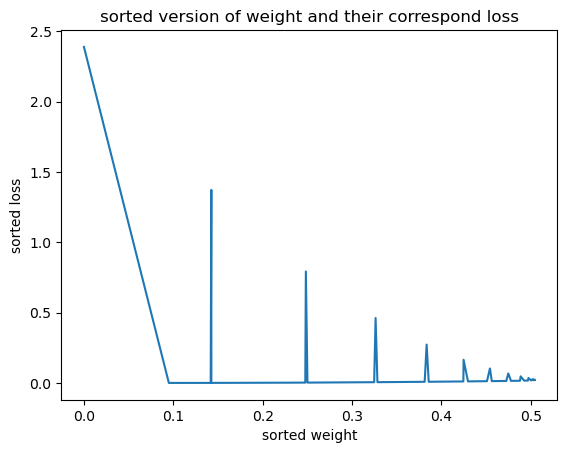

In [177]:
comb_l = []
for i in range(len(w_l)):
    comb_l.append([w_l[i], loss_l[i], gradients_wl])
# print(sorted(comb_l))
comb_l.sort()
comb_wl = []
comb_ll = []
comb_gl = []
for i in range(len(comb_l)):
    comb_wl.append(comb_l[i][0])
    comb_ll.append(comb_l[i][1])
    comb_gl.append(comb_l[i][2])
# print(comb_wl)
# print(comb_ll)
plt.figure("W-L")
plt.title("sorted version of weight and their correspond loss")
plt.xlabel("sorted weight")
plt.ylabel("sorted loss")
plt.plot(comb_wl, comb_ll)

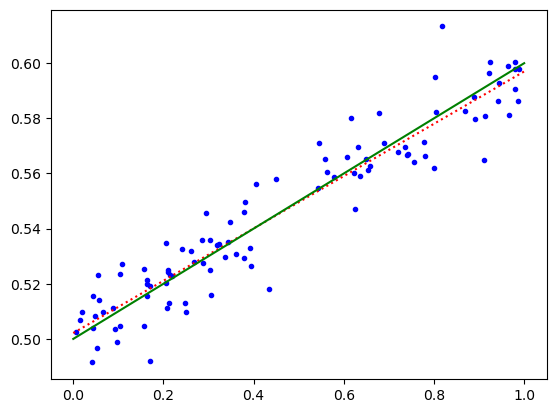

In [178]:
w_true = 0.1
b_true = 0.5
plt.plot(X.numpy(), Y.numpy(), 'b.')
plt.plot([0,1], [0*w+b, 1*w+b], 'r:')
plt.plot([0,1], [0*w_true+b_true, 1*w_true+b_true], 'g')
plt.show()

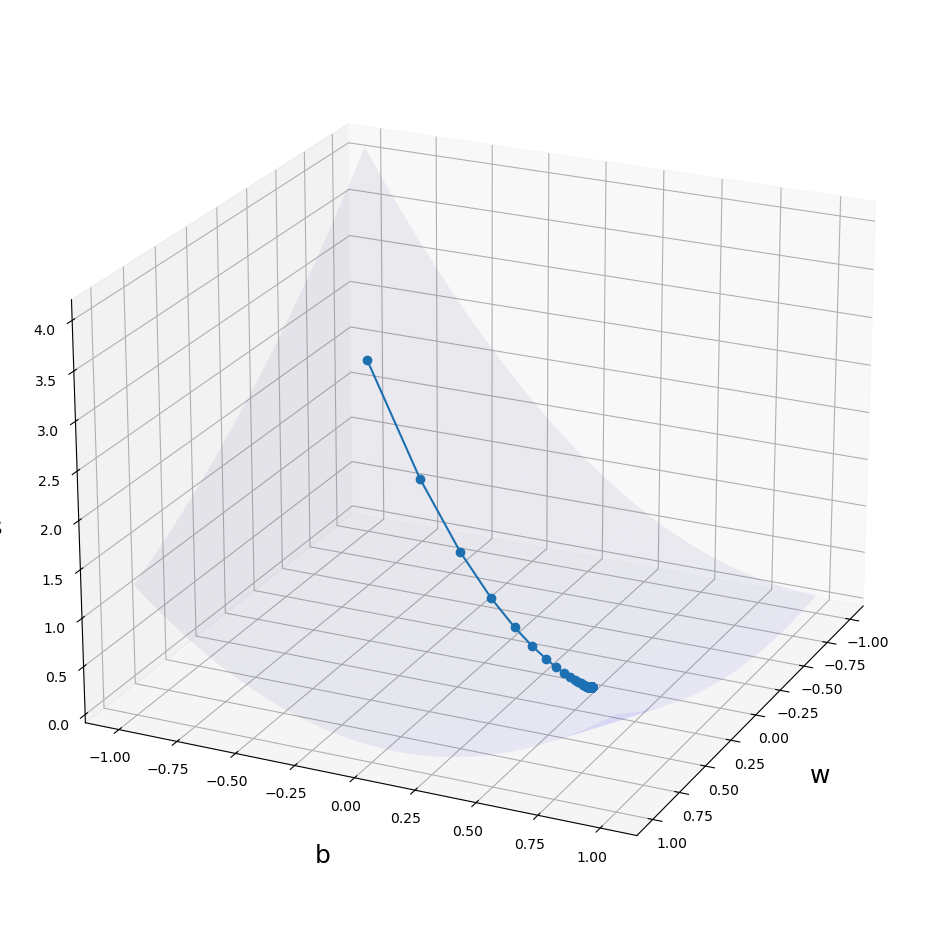

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)

def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss

# if you want to use the one argument predict
# def predict(x):
#     y = x*w + b
#     return y

zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-0.5)
b = tf.Variable(-0.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        # can't use the previous predict function with one argument
        # predictions = predict(X)
        predictions = predict(X, w, b)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
plt.show()